In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
sns.set_style("whitegrid")

### Vizualisation of species variation in pathways

1. From `concatenated.tsv`
2. Add `speciesKey` for `acceptedKey` (use GBIF services)
3. Group # of unique `speciesKey` by pathway (note: currently ' | ' separated)
4. Order pathways in main and sub categories [according to CBD](https://github.com/inbo/alien-species-checklist/issues/62#issuecomment-217879029)
5. Create `tsv` that can be used by the R-script to make the graph

In [4]:
concat_data = pd.read_csv("../data/processed/checklist.tsv", sep="\t", dtype=object)

In [23]:
concat_data.columns

Index(['index', 'nameMatchValidation', 'taxonID', 'datasetName', 'taxonRank',
       'scientificName', 'verbatimScientificName', 'synonym', 'kingdom',
       'phylum', 'class', 'order', 'family', 'genus', 'specificEpithet',
       'infraspecificEpithet', 'vernacularNameEN', 'vernacularNameNL',
       'vernacularNameFR', 'verbatimInvasionStage', 'invasionStage',
       'invasionStageCertainty', 'BFIS', 'ISEIA', 'spatialDistribution',
       'invasiveness', 'verbatimIntroductionPathway', 'introductionPathway',
       'introductionMode', 'verbatimHabitat', 'habitat', 'verbatimNativeRange',
       'nativeRange', 'verbatimPresenceBE', 'verbatimPresenceFL',
       'verbatimPresenceWA', 'verbatimPresenceBR', 'verbatimPresenceBECoast',
       'verbatimPresenceBPNS', 'verbatimPresenceBEEZ', 'presenceBE',
       'presenceFL', 'presenceWA', 'presenceBR', 'presenceBECoast',
       'presenceBPNS', 'presenceBEEZ', 'firstObservationYearBE',
       'firstObservationYearFL', 'latestObservationYearBE', 

### Get speciesKey for acceptedKeys

Using the Gbif services, we ask for the corresponding `speciesKey` based on the available `acceptedKey`:

In [24]:
import requests

In [25]:
def get_species_key(accepted_key):
    """get corresponding species key from acceptedKey-values"""
    r = requests.get("http://api.gbif.org/v1/species/" + str(accepted_key))
    try :
        key = str(r.json()["speciesKey"])
    except:
        key = None
    return key

In [26]:
concat_data.columns

Index(['index', 'nameMatchValidation', 'taxonID', 'datasetName', 'taxonRank',
       'scientificName', 'verbatimScientificName', 'synonym', 'kingdom',
       'phylum', 'class', 'order', 'family', 'genus', 'specificEpithet',
       'infraspecificEpithet', 'vernacularNameEN', 'vernacularNameNL',
       'vernacularNameFR', 'verbatimInvasionStage', 'invasionStage',
       'invasionStageCertainty', 'BFIS', 'ISEIA', 'spatialDistribution',
       'invasiveness', 'verbatimIntroductionPathway', 'introductionPathway',
       'introductionMode', 'verbatimHabitat', 'habitat', 'verbatimNativeRange',
       'nativeRange', 'verbatimPresenceBE', 'verbatimPresenceFL',
       'verbatimPresenceWA', 'verbatimPresenceBR', 'verbatimPresenceBECoast',
       'verbatimPresenceBPNS', 'verbatimPresenceBEEZ', 'presenceBE',
       'presenceFL', 'presenceWA', 'presenceBR', 'presenceBECoast',
       'presenceBPNS', 'presenceBEEZ', 'firstObservationYearBE',
       'firstObservationYearFL', 'latestObservationYearBE', 

In [27]:
concat_data["species_key"] = concat_data.apply(lambda x: get_species_key(x["gbifapi_acceptedKey"]), axis=1)

In [28]:
concat_data[["species_key", "gbifapi_acceptedKey"]].head()

,species_key,gbifapi_acceptedKey
0,4287131,4287131
1,2402129,2402129
2,2402168,2402168
3,2340989,2340989
4,5851603,5851603


Check for which these are different:

In [29]:
concat_data[concat_data["species_key"].astype(float) - concat_data["gbifapi_acceptedKey"].astype(float) > 0.0]

,index,nameMatchValidation,taxonID,datasetName,taxonRank,scientificName,verbatimScientificName,synonym,kingdom,phylum,...,manual_acceptedKey,gbifapi_usageKey,gbifapi_scientificName,gbifapi_canonicalName,gbifapi_status,gbifapi_rank,gbifapi_matchType,gbifapi_acceptedKey,gbifapi_acceptedScientificName,species_key
414,414,ok,NaN,plants,subspecies,Pastinaca sativa L. subsp. sativa,Pastinaca sativa L. subsp. sativa,NaN,Plantae,NaN,...,NaN,7224157,Pastinaca sativa subsp. sativa,Pastinaca sativa sativa,ACCEPTED,SUBSPECIES,EXACT,7224157,Pastinaca sativa subsp. sativa,8262702
415,415,verify: SYNONYM probably invalid,NaN,plants,subspecies,Pastinaca sativa L. subsp. urens (Req. ex Godr...,Pastinaca sativa L. subsp. urens (Req. ex Godr...,NaN,Plantae,NaN,...,NaN,7466434,Pastinaca sativa subsp. urens (Req. ex Godr.) ...,Pastinaca sativa urens,SYNONYM,SUBSPECIES,EXACT,7224157,Pastinaca sativa subsp. sativa,8262702
545,546,wrong match: other rank,NaN,plants,subspecies,Carduus nutans L. subsp. leiophyllus (Petrovič...,Carduus nutans L. subsp. leiophyllus (Petrovič...,NaN,Plantae,NaN,...,NaN,6290237,Carduus nutans var. leiophyllus (Petrovic) Arènes,Carduus nutans leiophyllus,SYNONYM,VARIETY,EXACT,4274443,Carduus nutans subsp. leiophyllus (Petrovic) S...,8185959
546,545,verify: SYNONYM probably invalid,NaN,plants,species,Carduus hamulosus Ehrh.,Carduus hamulosus Ehrh.,NaN,Plantae,NaN,...,NaN,3114679,Carduus hamulosus Ehrh.,Carduus hamulosus,SYNONYM,SPECIES,EXACT,4212130,Carduus nutans subsp. platypus (Lange) Greuter,8185959
548,548,ok: SYNONYM confirmed,NaN,plants,species,Carduus vivariensis Jord.,Carduus vivariensis Jord.,NaN,Plantae,NaN,...,NaN,4210773,Carduus vivariensis Jord.,Carduus vivariensis,SYNONYM,SPECIES,EXACT,6076849,Carduus nigrescens subsp. vivariensis (Jord.) ...,7984807
601,601,ok,NaN,plants,subspecies,Crepis sancta (L.) Bornm. subsp. nemausensis (...,Crepis sancta (L.) Bornm. subsp. nemausensis (...,NaN,Plantae,NaN,...,NaN,5831068,Crepis sancta subsp. nemausensis (Gouan) Babc.,Crepis sancta nemausensis,ACCEPTED,SUBSPECIES,EXACT,5831068,Crepis sancta subsp. nemausensis (Gouan) Babc.,8035432
614,614,ok: SYNONYM confirmed,NaN,plants,hybrid,Doronicum x willdenowii (Rouy) A.W. Hill,Doronicum x willdenowii (Rouy) A.W. Hill (? D....,NaN,Plantae,NaN,...,NaN,4230874,Doronicum willdenowii (Rouy) A.W.Hill,Doronicum willdenowii,SYNONYM,SPECIES,EXACT,6077214,Doronicum plantagineum subsp. emarginatum (H.J...,8340385
686,686,verify: SYNONYM,NaN,plants,variety,Matricaria recutita L. var. coronata (J. Gay e...,Matricaria recutita L. var. coronata (J. Gay e...,NaN,Plantae,NaN,...,NaN,8258539,Matricaria recutita var. coronata (J.Gay ex Bo...,Matricaria recutita coronata,SYNONYM,VARIETY,EXACT,6291909,Chamomilla chamomilla var. coronata J.Gay ex B...,8058861
700,700,verify: SYNONYM,NaN,plants,species,Pilosella bauhini (Schult. ex Besser) Arv.-Touv.,Pilosella bauhinii (Schult. ex Besser) Arv.-Touv.,Hieracium bauhinii Schult. ex Besser,Plantae,NaN,...,NaN,6300805,Pilosella bauhini Arv.-Touv.,Pilosella bauhini,SYNONYM,SPECIES,EXACT,8111836,Pilosella piloselloides subsp. bauhini (Schult...,8288930
734,734,ok: SYNONYM probably valid,NaN,plants,species,Senecio vernalis Waldst. et Kit.,Senecio vernalis Waldst. et Kit.,NaN,Plantae,NaN,...,NaN,6063730,Senecio vernalis Waldst. & Kit.,Senecio vernalis,SYNONYM,SPECIES,EXACT,4228701,Senecio leucanthemifolius subsp. vernalis (Wal...,7624085


### Split pathway based on |

In [30]:
concat_data.groupby(['introductionPathway']).first().head()

,index,nameMatchValidation,taxonID,datasetName,taxonRank,scientificName,verbatimScientificName,synonym,kingdom,phylum,...,manual_acceptedKey,gbifapi_usageKey,gbifapi_scientificName,gbifapi_canonicalName,gbifapi_status,gbifapi_rank,gbifapi_matchType,gbifapi_acceptedKey,gbifapi_acceptedScientificName,species_key
introductionPathway,,,,,,,,,,,,,,,,,,,,,
contaminant > contaminant nursery material,412,ok,NaN,plants,species,Oenanthe pimpinelloides L.,Oenanthe pimpinelloides L.,C. flexuosa With. subsp. debilis (D. Don) O.E....,Plantae,NaN,...,NaN,5371889,Oenanthe pimpinelloides L.,Oenanthe pimpinelloides,ACCEPTED,SPECIES,EXACT,5371889,Oenanthe pimpinelloides L.,5371889
contaminant > contaminant nursery material | stowaway,645,ok: SYNONYM probably valid,NaN,plants,species,Gamochaeta pensylvanica (Willd.) Cabrera,Gamochaeta pensylvanica (Willd.) Cabrera,Gnaphalium pensylvanicum Willd.,Plantae,NaN,...,NaN,3103082,Gamochaeta pensylvanica (Willd.) Cabrera,Gamochaeta pensylvanica,SYNONYM,SPECIES,EXACT,5390730,Gnaphalium pensylvanicum Willd.,5390730
"contaminant > contaminant on animals (except parasites, species transported by host/vector)",6,ok,NaN,fishes,species,Carassius gibelio,Carassius gibelio,Aptenia cordifolia (L. f.) Schwantes,Animalia,NaN,...,NaN,2366634,"Carassius gibelio (Bloch, 1782)",Carassius gibelio,ACCEPTED,SPECIES,EXACT,2366634,"Carassius gibelio (Bloch, 1782)",2366634
"contaminant > contaminant on animals (except parasites, species transported by host/vector) | contaminant > transportation of habitat material (soil, vegetation,…)",317,ok: SYNONYM confirmed,NaN,plants,species,Blitum virgatum L.,Blitum virgatum L.,Chenopodium foliosum Aschers.,Plantae,NaN,...,NaN,5383969,Blitum virgatum L.,Blitum virgatum,SYNONYM,SPECIES,EXACT,3083844,Chenopodium foliosum Asch.,3083844
"contaminant > contaminant on animals (except parasites, species transported by host/vector) | stowaway",1055,ok,NaN,plants,species,Polycarpon tetraphyllum (L.) L.,Polycarpon tetraphyllum (L.) L.,NaN,Plantae,NaN,...,NaN,3085381,Polycarpon tetraphyllum (L.) L.,Polycarpon tetraphyllum,ACCEPTED,SPECIES,EXACT,3085381,Polycarpon tetraphyllum (L.) L.,3085381


In [31]:
def split_double_field_entry(df, keyword="|", column='introductionPathway'):
    """split on keyword in column for an enumeration and create extra record
    """
    s = df[column].str.lower().str.split(keyword).apply(pd.Series, 1).stack()
    s.index = s.index.droplevel(-1)
    s.name = column
    del df[column]
    return df.join(s)

In [32]:
pathway_uitvouwen = split_double_field_entry(concat_data, keyword="|", column='introductionPathway')

In [33]:
pathway_uitvouwen["introductionPathway"] = pathway_uitvouwen["introductionPathway"].str.strip()

In [34]:
unique_species = pathway_uitvouwen.groupby("introductionPathway").species_key.nunique()

In [35]:
unique_species = pd.DataFrame(unique_species).reset_index()

In [36]:
unique_species["category"] = unique_species["introductionPathway"].str.split(">").str.get(0).str.strip()
unique_species["subcategory"] = unique_species["introductionPathway"].str.split(">").str.get(1).str.strip()
unique_species = unique_species.rename(columns={"species_key": "count_species_key"})

In [38]:
unique_species.to_csv("../data/interim/pathway_figure_data.tsv", sep="\t")

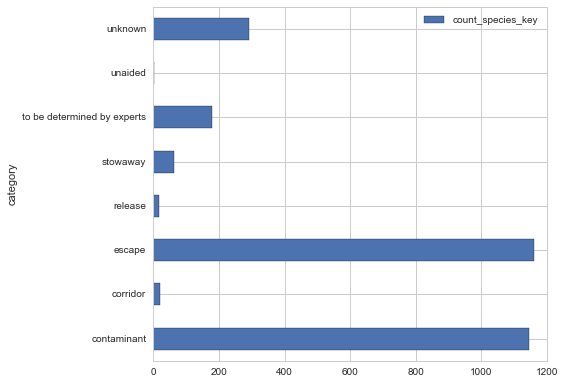

In [40]:
species_category = unique_species.groupby("category").agg({"count_species_key":sum})
species_category.plot(kind="barh", logx=False)
plt.tight_layout()
plt.savefig("category_count.png")

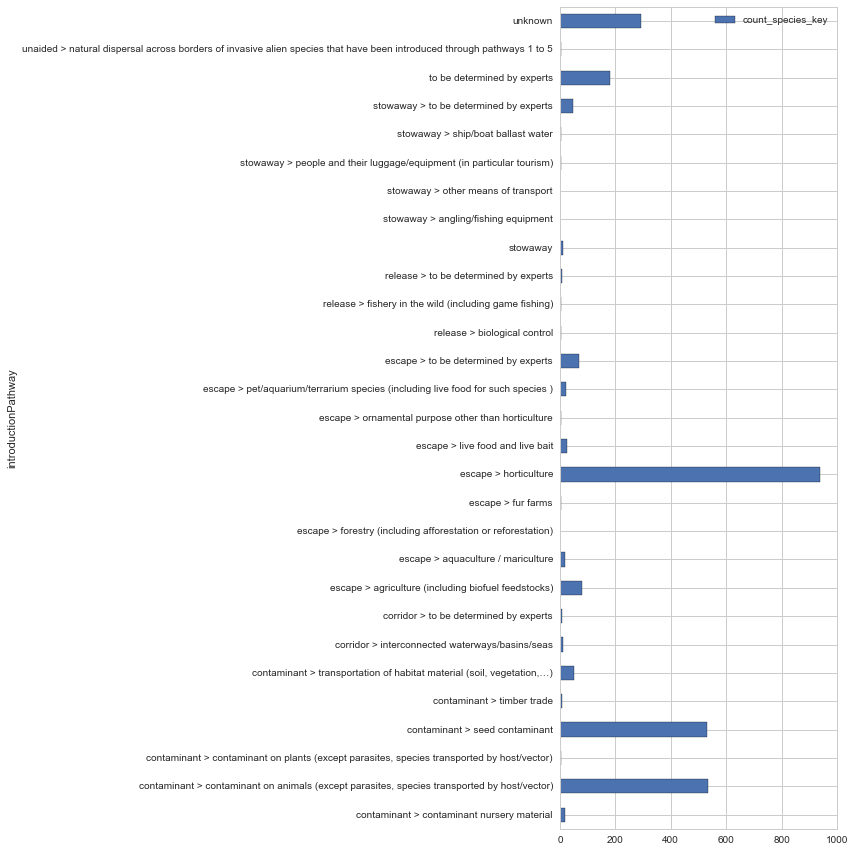

In [48]:
unique_species[["count_species_key", "introductionPathway"]].set_index("introductionPathway").plot(kind="barh", figsize=(12, 12))
plt.tight_layout()


In [42]:
unique_species['subcategory'] = unique_species['subcategory'].astype(str)
unique_species['category'] = unique_species['category'].astype(object)
unique_species["subcategory"] = unique_species["subcategory"].replace("nan", "unknown")

In [43]:
unique_species

,introductionPathway,count_species_key,category,subcategory
0,contaminant > contaminant nursery material,17,contaminant,contaminant nursery material
1,contaminant > contaminant on animals (except p...,533,contaminant,"contaminant on animals (except parasites, spec..."
2,contaminant > contaminant on plants (except pa...,4,contaminant,"contaminant on plants (except parasites, speci..."
3,contaminant > seed contaminant,531,contaminant,seed contaminant
4,contaminant > timber trade,7,contaminant,timber trade
5,contaminant > transportation of habitat materi...,52,contaminant,"transportation of habitat material (soil, vege..."
6,corridor > interconnected waterways/basins/seas,10,corridor,interconnected waterways/basins/seas
7,corridor > to be determined by experts,9,corridor,to be determined by experts
8,escape > agriculture (including biofuel feedst...,80,escape,agriculture (including biofuel feedstocks)
9,escape > aquaculture / mariculture,18,escape,aquaculture / mariculture


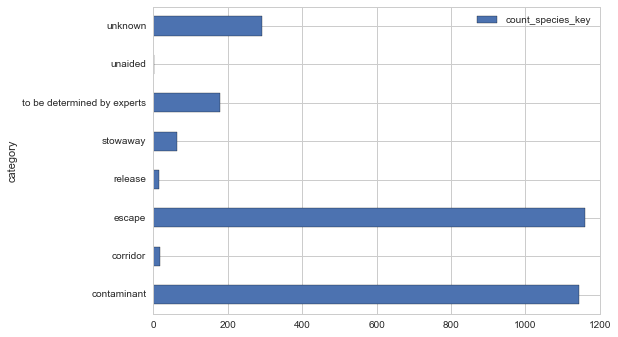

In [45]:
species_category = unique_species.groupby("category").agg({"count_species_key":sum})
species_category.plot(kind="barh", logx=False)